In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi
# import time 
# while True:
#   time.sleep(300)

Fri Mar 26 08:41:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 20210325_144504.mp4   Memes	   My_images_1	       Project_2_autonomous-car
'Colab Notebooks'     'My Drive'  'Objets connectée'  'yolov3 abouti'


In [3]:
import sys
sys.path.append('/mydrive/simulationVoitureAutonome/myData/')

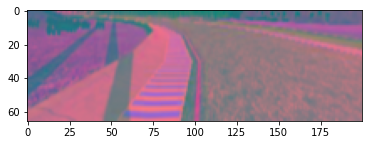

In [4]:
import lesutils

In [5]:
from lesutils import * 
from sklearn.model_selection import train_test_split  

In [6]:
#Step 1 j'importe mes données 
path = '/mydrive/simulationVoitureAutonome/myData/' 
data = importDataInfo(path)

Total Images Imported: 15078


In [7]:
#Step 2 # on doit equilibrer les données pour avoir les même nmbr d'images (droite, gauche ou centre) pour que la voiture soit bien equilibré sur le circuit
#autrement dit on fait l'equilibrage pour eviter les problèmes de regression 
data = balanceData(data, display = False)  

#Step 3 #data was in pandas format, we want to put them in a list and convert them in numpy arrays to easy use
imagesPath, steerings = loadData(path, data)
#print(imagesPath[0], steering[0])

#Step 4 SPLIT DATA (TRAINING data & TESTING data)
xTrain, xVal, yTrain, yVal = train_test_split(imagesPath, steerings, test_size= 0.2, random_state=5) #random_state = how much randomisation
print('Total Training Images:', len(xTrain)) 
print('Total Validation Images:', len(xVal)) 

Removed Images 11608
Remaining Images: 3470
Total Training Images: 2776
Total Validation Images: 694


In [ ]:
#Step 5 augmentation of data 

#Step 6

#Step 7
#Step 8 
model = createModel()
model.summary() 

#Step 9 

#STEP 10
history = model.fit(batchGen(xTrain, yTrain, 100, 1), steps_per_epoch = 300, epochs = 50, validation_data = batchGen(xVal, yVal, 100, 0), validation_steps = 200)
#history = model.fit(batchGen(xTrain, yTrain, 200, 1), steps_per_epoch = 200, epochs = 40, validation_data = batchGen(xVal, yVal, 200, 0), validation_steps = 200) # marche mais fini jamais
#history = model.fit(batchGen(xTrain, yTrain, 200, 1), steps_per_epoch = 200, epochs = 20, validation_data = batchGen(xVal, yVal, 200, 0), validation_steps = 200) # marche mieux que 1
#history = model.fit(batchGen(xTrain, yTrain, 200, 1), steps_per_epoch = 200, epochs = 30, validation_data = batchGen(xVal, yVal, 200, 0), validation_steps = 200) # marche mais fini jamais
#history = model.fit(batchGen(xTrain, yTrain, 300, 1), steps_per_epoch = 300, epochs = 40, validation_data = batchGen(xVal, yVal, 300, 0), validation_steps = 300)  # marche mais fini jamais
#history = model.fit(batchGen(xTrain, yTrain, 100, 1), steps_per_epoch = 100, epochs = 20, validation_data = batchGen(xVal, yVal, 100, 0), validation_steps = 100)  # 1 marche mais modele pas bon 1
#STEP 10
#model.save_weights('/mydrive/Project_2_autonomous-car/myData/my_checkpoint')###################
###################
model.save('/mydrive/simulationVoitureAutonome/myData/model.h5')
print('Model Saved')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.ylim([0, 1]) 
plt.title('Loss')
plt.xlabel('Epoch') 
plt.show() 

Streaming output truncated to the last 5000 lines.
0.7980745619805778 0.20189058449948194 0.49484433207630074 0.27914729927726156
0.9498698145303642 0.0055301212746031725 0.4152742407402813 0.5780938702449201
0.6211652614386791 0.9709325187588971 0.17735165394627583 0.4453447011981291
0.7078186154126335 0.9438134601968525 0.5831892165290804 0.1495255230210185
225/300 [=====================>........] - ETA: 1:28 - loss: 0.07710.0019931338753741423 0.5595057744685235 0.23069373035067786 0.5166020535386376
0.42326793367061777 0.13948498745782067 0.5720417929310407 0.36679864190988987
0.9590431130756785 0.14034915606533904 0.5815207695055908 0.0773553520730007
0.3131201580256847 0.9618433775918331 0.5447250277699364 0.40746458772700145
0.8945602610586014 0.5619942978570159 0.10290868271795872 0.3390443914924791
0.020528420125609403 0.38303169558818095 0.5786822583870747 0.6688203670387654
0.4141182544513472 0.2781015326988179 0.41579496383077663 0.7433502453251376
0.9523960464755865 0.1260